YELP - Prediction

#### Each attribute with missing values in our dataset is a categorical feature and, in the subsequent models wetreat (Missing) as an explicit category. 

a) Creating a missing category may cause the model to train treating missing as a separate category and may give incorrect results.
There is a large number of missing values and there are sevaral ways of dealing with categorical missing values. However, certain columns that have >40% missing values need to be dropped as it will not contribute greatly towards building a good model.

Simply create a new category for the missing. This will only work when there is an underlying reason for missing.
Pros:
Less possibilities with one extra category, resulting in low variance after one hot encoding — since it is categorical
Negates the loss of data by adding an unique category
Cons:
Adds less variance
Adds another feature to the model while encoding, which may result in poor performance


Other methods we can consider: 
Ignore observation
Replace by most frequent value
Replace using an algorithm like KNN using the neighbours.
Predict the observation using a multiclass predictor.

### b) Linear Regression model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

In [2]:
np.random.seed(10)

In [3]:
yelp_train=pd.read_csv('yelp242_train.csv')
yelp_train.head()

,stars,review_count,GoodForKids,Alcohol,BusinessAcceptsCreditCards,WiFi,BikeParking,ByAppointmentOnly,WheelechairAccessible,OutdoorSeating,RestaurantsReservations,DogsAllowed,Caters
0,4.5,153,FALSE,'beer_and_wine',TRUE,'free',FALSE,(Missing),(Missing),FALSE,TRUE,FALSE,FALSE
1,3.5,19,TRUE,(Missing),TRUE,'free',(Missing),(Missing),(Missing),(Missing),FALSE,(Missing),(Missing)
2,4.5,3,TRUE,'full_bar',TRUE,(Missing),(Missing),(Missing),(Missing),TRUE,(Missing),(Missing),(Missing)
3,4.0,775,TRUE,'none',TRUE,'free',TRUE,FALSE,(Missing),TRUE,TRUE,(Missing),TRUE
4,3.5,24,TRUE,'full_bar',TRUE,'free',(Missing),(Missing),(Missing),FALSE,TRUE,(Missing),(Missing)


In [4]:
yelp_test=pd.read_csv('yelp242_test.csv')
yelp_test.head()

,stars,review_count,GoodForKids,Alcohol,BusinessAcceptsCreditCards,WiFi,BikeParking,ByAppointmentOnly,WheelechairAccessible,OutdoorSeating,RestaurantsReservations,DogsAllowed,Caters
0,4.0,34,(Missing),'full_bar',TRUE,'free',TRUE,(Missing),TRUE,TRUE,TRUE,FALSE,TRUE
1,4.0,802,TRUE,(Missing),TRUE,'free',FALSE,(Missing),(Missing),TRUE,(Missing),FALSE,TRUE
2,4.0,231,TRUE,'full_bar',TRUE,'free',FALSE,FALSE,(Missing),FALSE,TRUE,FALSE,TRUE
3,2.0,27,TRUE,'none',TRUE,'free',TRUE,(Missing),TRUE,FALSE,FALSE,FALSE,TRUE
4,3.5,6,(Missing),'beer_and_wine',TRUE,(Missing),(Missing),(Missing),(Missing),FALSE,FALSE,(Missing),(Missing)


In [5]:
import statsmodels.formula.api as smf



In [6]:
model1 = smf.ols(formula='stars ~ review_count + C(GoodForKids, Treatment(reference="(Missing)"))+ C(Alcohol, Treatment(reference="(Missing)"))+C(BusinessAcceptsCreditCards, Treatment(reference="(Missing)"))+ C(WiFi, Treatment(reference="(Missing)"))+C(BikeParking, Treatment(reference="(Missing)"))+C(WheelechairAccessible, Treatment(reference="(Missing)"))+ C(OutdoorSeating, Treatment(reference="(Missing)"))+ C(RestaurantsReservations, Treatment(reference="(Missing)"))+C(DogsAllowed, Treatment(reference="(Missing)"))+C(Caters, Treatment(reference="(Missing)"))',data=yelp_train).fit()

print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  stars   R-squared:                       0.170
Model:                            OLS   Adj. R-squared:                  0.167
Method:                 Least Squares   F-statistic:                     55.64
Date:                Thu, 20 Oct 2022   Prob (F-statistic):          5.59e-232
Time:                        12:48:45   Log-Likelihood:                -7232.7
No. Observations:                6272   AIC:                         1.451e+04
Df Residuals:                    6248   BIC:                         1.468e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                                                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

In [7]:
coef_df = pd.DataFrame(model1.summary().tables[1].data)
coef_df.columns = coef_df.iloc[0]
coef_df.index = coef_df[""]
coef_df = coef_df.iloc[1:,1:]
coef_df

,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,3.3451,0.039,85.483,0.000,3.268,3.422
"C(GoodForKids, Treatment(reference=""(Missing)""))[T.FALSE]",-0.0209,0.046,-0.458,0.647,-0.111,0.069
"C(GoodForKids, Treatment(reference=""(Missing)""))[T.TRUE]",-0.1255,0.035,-3.556,0.000,-0.195,-0.056
"C(Alcohol, Treatment(reference=""(Missing)""))[T.'beer_and_wine']",0.1955,0.047,4.169,0.000,0.104,0.287
"C(Alcohol, Treatment(reference=""(Missing)""))[T.'full_bar']",0.1185,0.044,2.721,0.007,0.033,0.204
"C(Alcohol, Treatment(reference=""(Missing)""))[T.'none']",0.0987,0.039,2.531,0.011,0.022,0.175
"C(BusinessAcceptsCreditCards, Treatment(reference=""(Missing)""))[T.FALSE]",0.6593,0.087,7.579,0.000,0.489,0.830
"C(BusinessAcceptsCreditCards, Treatment(reference=""(Missing)""))[T.TRUE]",0.1421,0.046,3.076,0.002,0.052,0.233
"C(WiFi, Treatment(reference=""(Missing)""))[T.'free']",0.0720,0.034,2.098,0.036,0.005,0.139


In [8]:
def OSR2(model, df_train, df_test, dependent_var):   
    
    y_test = df_test[dependent_var]
    y_pred = model.predict(df_test)
    SSE = np.sum((y_test - y_pred)**2)
    SST = np.sum((y_test - np.mean(df_train[dependent_var]))**2)    
    
    return 1 - SSE/SST

In [9]:
def MAE(model, df_train, df_test, dependent_var):   
    
    y_test = df_test[dependent_var]
    y_pred = model.predict(df_test)
    MAE = np.mean(np.abs(y_test-y_pred))
    return MAE
    

In [10]:

print("The OSR2 for Linear Regression= ",OSR2(model1, yelp_train, yelp_test, 'stars') )

The OSR2 for Linear Regression=  0.15097762949425841


In [11]:
mae=MAE(model1, yelp_train, yelp_test, 'stars')
print("The MAE for Linear Regression=",mae)

The MAE for Linear Regression= 0.6406880153775292


### Regression Tree (CART)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
RT_yelp=pd.get_dummies(yelp_train)

In [14]:
y_CTR_train = RT_yelp['stars']
x_CTR_train = RT_yelp.drop(['stars'], axis=1)

y_CTR_test=yelp_test['stars']
x_CTR_test = pd.get_dummies(yelp_test.drop(['stars'], axis=1))

In [15]:
y_CTR_test


0       4.0
1       4.0
2       4.0
3       2.0
4       3.5
       ... 
2683    2.5
2684    2.0
2685    4.0
2686    3.5
2687    3.5
Name: stars, Length: 2688, dtype: float64

In [16]:


grid_values = {'ccp_alpha': np.linspace(0, 0.001, 50)}

dtr = DecisionTreeRegressor(min_samples_leaf=5, min_samples_split=20, random_state=10)
dtr_cv = GridSearchCV(dtr, param_grid=grid_values, scoring='r2', cv=5, verbose=0)
dtr_cv.fit(x_CTR_train, y_CTR_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeRegressor(min_samples_leaf=5,
                                             min_samples_split=20,
                                             random_state=10),
             param_grid={'ccp_alpha': array([0.00000000e+00, 2.04081633e-05, 4.08163265e-05, 6.12244898e-05,
       8.16326531e-05, 1.02040816e-04, 1.22448980e-04, 1.42857143e-04,
       1.63265306e-04, 1.83673469e-04, 2.04081633e-04, 2.24489796e-04,
       2.44897959e-04, 2.65306122e-04, 2....
       4.89795918e-04, 5.10204082e-04, 5.30612245e-04, 5.51020408e-04,
       5.71428571e-04, 5.91836735e-04, 6.12244898e-04, 6.32653061e-04,
       6.53061224e-04, 6.73469388e-04, 6.93877551e-04, 7.14285714e-04,
       7.34693878e-04, 7.55102041e-04, 7.75510204e-04, 7.95918367e-04,
       8.16326531e-04, 8.36734694e-04, 8.57142857e-04, 8.77551020e-04,
       8.97959184e-04, 9.18367347e-04, 9.38775510e-04, 9.59183673e-04,
       9.79591837e-04, 1.00000000e-03])},
             scoring='r2')

In [17]:
ccp_alpha = dtr_cv.cv_results_['param_ccp_alpha'].data
R2_scores = dtr_cv.cv_results_['mean_test_score']


In [18]:
# pd.DataFrame({'ccp alpha' : ccp_alpha, 'R2': R2_scores}).head(20)

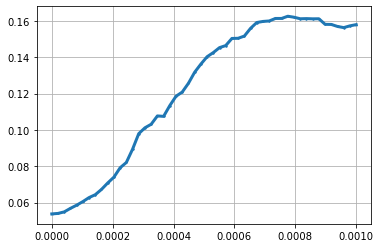

In [19]:
plt.scatter(ccp_alpha, R2_scores, s=2)
plt.plot(ccp_alpha, R2_scores, linewidth=3)
plt.grid(True, which='both')
plt.show()

In [20]:
print('Best ccp_alpha', dtr_cv.best_params_)

Best ccp_alpha {'ccp_alpha': 0.0007755102040816326}


###  cross-validation and complexity parameter value

The cross validation technique used is Kfold for 5 folds. The 5 fold technique divides the dataset into 5 parts and it is run for 5 iterations. Each iteration trains on the remaining 4 folds and test as one fold. Corresponding metrics are performed on the test fold. 
Each fold is diverse and after all the iterations, the metrics(r2,accuracy etc) are aggregated to get the final value to evaluate the models performance.We make the model better using grid search.The idea is to specify a range of values for a parameter we can set in the model and combinations  across all the different values in the range and run and this is evaluated.

In this case, we have used cpp as the parameter with a range of values. 
When grid search is combined with the model using cross validation, we run the model with different values of cpp in the range specified. 

Finally all these models with different cpp values are compared and the model with the best metric(scoring parameter set here is r2) and the cpp for the model with the best r2 is given as the best cpp parameter(in this case =0.00077)  

In [21]:
print('CV R2:', round(dtr_cv.best_score_, 5))
print('OSR2:', round(r2_score(y_CTR_test, dtr_cv.predict(x_CTR_test)), 5))

CV R2: 0.16258
OSR2: 0.17348


In [22]:
y_pred = dtr_cv.predict(x_CTR_test)

In [23]:
def mae2(y_true, predictions):
    y_true, predictions = np.array(y_true), np.array(predictions)
    return np.mean(np.abs(y_true - predictions))
    

In [24]:
pred_CTR=dtr_cv.predict(x_CTR_test)

In [25]:
mae=mae2(y_CTR_test,pred_CTR)
print(mae)

0.6222700732192287


## Comparison

Linear Regression - 
<br />
OSR2-0.15097762949425841
<br />
MAE-0.6406880153775292


Decision tree classifier:
<br />
OSR2 - 0.17348
<br />
MAE - 0.6222700732192287

The Decision tree classifier is a better performing model as it has a higher OSR2 and a lower Mean Absolute Error which implies that the predicted values match the real values much better than the Linear Regression.

### c) Random Forest

In [26]:
np.random.seed(10)

In [27]:
#getdummies

RF_train=pd.get_dummies(pd.read_csv('yelp242_train.csv'))
RF_test=pd.get_dummies(pd.read_csv('yelp242_test.csv'))
y_RF_train = RF_train['stars']
x_RF_train = RF_train.drop(['stars'], axis=1)

y_RF_test=RF_test['stars']
x_RF_test = RF_test.drop(['stars'], axis=1)

In [28]:
x_RF_train.head()

,review_count,GoodForKids_(Missing),GoodForKids_FALSE,GoodForKids_TRUE,Alcohol_'beer_and_wine',Alcohol_'full_bar',Alcohol_'none',Alcohol_(Missing),BusinessAcceptsCreditCards_(Missing),BusinessAcceptsCreditCards_FALSE,...,OutdoorSeating_TRUE,RestaurantsReservations_(Missing),RestaurantsReservations_FALSE,RestaurantsReservations_TRUE,DogsAllowed_(Missing),DogsAllowed_FALSE,DogsAllowed_TRUE,Caters_(Missing),Caters_FALSE,Caters_TRUE
0,153,0,1,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
1,19,0,0,1,0,0,0,1,0,0,...,0,0,1,0,1,0,0,1,0,0
2,3,0,0,1,0,1,0,0,0,0,...,1,1,0,0,1,0,0,1,0,0
3,775,0,0,1,0,0,1,0,0,0,...,1,0,0,1,1,0,0,0,0,1
4,24,0,0,1,0,1,0,0,0,0,...,0,0,0,1,1,0,0,1,0,0


In [29]:
from sklearn.ensemble import RandomForestRegressor


rf = RandomForestRegressor(max_features=5, min_samples_leaf=5, n_estimators = 500)
rf.fit(x_RF_train, y_RF_train)

RandomForestRegressor(max_features=5, min_samples_leaf=5, n_estimators=500)

In [30]:
print('OSR2:', round(r2_score(y_RF_test, rf.predict(x_RF_test)), 5))

OSR2: 0.21899


#### limit the number of features used at any split

Max_features hyperparameter.
This resembles the number of maximum features provided to each tree in a random forest.

Random forest models randomly resample features prior to determining the best split. Max_features determines the number of features to resample. Larger max_feature values can result in improved model performance because trees have a larger selection of features from which choose the best split, but can also cause trees to be less diverse and induce overfitting. The common theme here is one needs to identify an optimal value that balances overfitting and under-fitting. Common choices include:

‘auto’: places no restrictions on the number of features,

‘sqrt’: square root of the total number of features,

‘log2’: base two logarithm of the total number of features.




In [31]:
#with CV = 5
import time

grid_values = {'max_features': np.linspace(1,18,9, dtype='int32'),
              'min_samples_leaf': [5],
              'n_estimators': [500],
              'random_state': [10]} 

tic = time.time()

rf = RandomForestRegressor() 
rf_cv = GridSearchCV(rf, param_grid=grid_values, scoring='r2', cv=5)
rf_cv.fit(x_RF_train, y_RF_train)

toc = time.time()
print('time:', round(toc-tic, 2),'s')


time: 48.54 s


In [32]:
max_features = rf_cv.cv_results_['param_max_features'].data
R2_scores = rf_cv.cv_results_['mean_test_score']

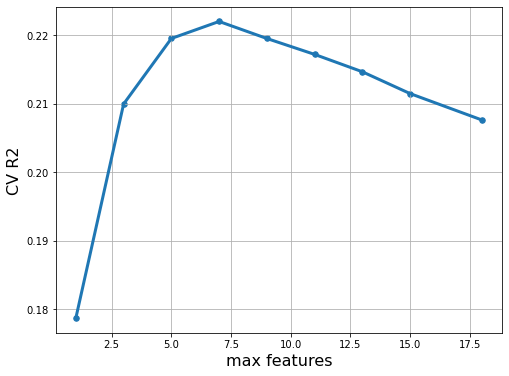

In [33]:


plt.figure(figsize=(8, 6))
plt.xlabel('max features', fontsize=16)
plt.ylabel('CV R2', fontsize=16)
plt.scatter(max_features, R2_scores, s=30)
plt.plot(max_features, R2_scores, linewidth=3)
plt.grid(True, which='both')
# plt.xlim([1, 19])
# plt.ylim([0.3, 0.6])

In [34]:
print(rf_cv.best_params_)

{'max_features': 7, 'min_samples_leaf': 5, 'n_estimators': 500, 'random_state': 10}


In [35]:
print('CV R2:', round(rf_cv.best_score_, 5))
print('OSR2:', round(r2_score(y_RF_test, rf_cv.predict(x_RF_test)), 5))

CV R2: 0.22203
OSR2: 0.22223


### d) Bootstrap

#### Describe the bootstrap procedure as a general statistical procedure and explain why it is useful.

Bootstrapping is a statistical procedure that resamples a single dataset to create many simulated samples. This process allows you to calculate standard errors, construct confidence intervals, and perform hypothesis testing for numerous types of sample statistics. Bootstrap methods are alternative approaches to traditional hypothesis testing and are notable for being easier to understand and valid for more conditions.

###  general bootstrap procedure

The bootstrap method is a statistical technique for estimating quantities about a population by averaging estimates from multiple small data samples.

Importantly, samples are constructed by drawing observations from a large data sample one at a time and returning them to the data sample after they have been chosen. This allows a given observation to be included in a given small sample more than once. This approach to sampling is called sampling with replacement.

The process for building one sample can be summarized as follows:<br>

Choose the size of the sample.<br>
While the size of the sample is less than the chosen size<br>
Randomly select an observation from the dataset<br>
Add it to the sample<br>
The bootstrap method can be used to estimate a quantity of a population. This is done by repeatedly taking small samples, calculating the statistic, and taking the average of the calculated statistics. We can summarize this procedure as follows:<br>

Choose a number of bootstrap samples to perform<br>
Choose a sample size<br>
For each bootstrap sample<br>
Draw a sample with replacement with the chosen size<br>
Calculate the statistic on the sample<br>
Calculate the mean of the calculated sample statistics.<br>
The procedure can also be used to estimate the skill of a machine learning model.<br>



This is done by training the model on the sample and evaluating the skill of the model on those samples not included in the sample. These samples not included in a given sample are called the out-of-bag samples, or OOB for short.<br>

This procedure of using the bootstrap method to estimate the skill of the model can be summarized as follows:<br>

Choose a number of bootstrap samples to perform<br>
Choose a sample size<br>
For each bootstrap sample<br>
Draw a sample with replacement with the chosen size<br>
Fit a model on the data sample<br>
Estimate the skill of the model on the out-of-bag sample.<br>
Calculate the mean of the sample of model skill estimates.<br>
The samples not selected are usually referred to as the “out-of-bag” samples. For a given iteration of bootstrap resampling, a model is built on the selected samples and is used to predict the out-of-bag samples.<br>

Importantly, any data preparation prior to fitting the model or tuning of the hyperparameter of the model must occur within the for-loop on the data sample. This is to avoid data leakage where knowledge of the test dataset is used to improve the model. This, in turn, can result in an optimistic estimate of the model skill.<br>

A useful feature of the bootstrap method is that the resulting sample of estimations often forms a Gaussian distribution. In additional to summarizing this distribution with a central tendency, measures of variance can be given, such as standard deviation and standard error. Further, a confidence interval can be calculated and used to bound the presented estimate. This is useful when presenting the estimated skill of a machine learning model.<br>


sources:machinelearningmastery.com

In [36]:
#metrics


def OS_R_squared(predictions, y_test,y_train):
    SSE = np.sum((y_test-predictions)**2)
    SST = np.sum((y_test-np.mean(y_train))**2)
    r2 = 1-SSE/SST
    return r2

def mean_squared_error(predictions, y_test,y_train):
    MSE = np.mean((y_test-predictions)**2)
    return MSE

def mean_absolute_error(predictions, y_test,y_train):
    MAE = np.mean(np.abs(y_test-predictions))
    return MAE

In [37]:
y_pred = rf_cv.predict(x_RF_test)
print("OSR2: %s" % OS_R_squared(y_pred,y_RF_test,y_RF_train))
print("MSE: %s" % mean_squared_error(y_pred,y_RF_test,y_RF_train))
print("MAE: %s" % mean_absolute_error(y_pred,y_RF_test,y_RF_train))

OSR2: 0.22230516703194747
MSE: 0.5791998809983638
MAE: 0.6070644457369029


In [38]:
print('OSR2:', round(r2_score(y_RF_test, rf_cv.predict(x_RF_test)), 5))
print("MSE: %s" % np.mean((y_pred-y_RF_test)**2))
print("MAE: %s" % np.mean(np.abs(y_pred-y_RF_test)))

OSR2: 0.22223
MSE: 0.5791998809983638
MAE: 0.6070644457369029


In [39]:
import time

def bootstrap_validation(test_data, test_label, train_label, model, metrics_list, sample=500, random_state=10):
    tic = time.time()
    n_sample = sample
    n_metrics = len(metrics_list)
    output_array=np.zeros([n_sample, n_metrics])
    output_array[:]=np.nan
    print(output_array.shape)
    for bs_iter in range(n_sample):
        bs_index = np.random.choice(test_data.index, len(test_data.index), replace=True)
        bs_data = test_data.loc[bs_index]
        bs_label = test_label.loc[bs_index]
        bs_predicted = model.predict(bs_data)
        for metrics_iter in range(n_metrics):
            metrics = metrics_list[metrics_iter]
            output_array[bs_iter, metrics_iter]=metrics(bs_predicted,bs_label,train_label)
        if bs_iter % 100 == 0:
            print(bs_iter, time.time()-tic)
    output_df = pd.DataFrame(output_array)
    return output_df

In [40]:
#DecisionTree regressor

In [41]:
bs_output_RT = bootstrap_validation(x_CTR_test,y_CTR_test,y_CTR_train,dtr_cv,
                                 metrics_list=[OS_R_squared,mean_absolute_error],
                                 sample = 5000)

(5000, 2)
0 0.0037071704864501953
100 0.13852787017822266
200 0.2721741199493408
300 0.4048120975494385
400 0.5403938293457031
500 0.6729168891906738
600 0.803825855255127
700 0.9349339008331299
800 1.0671780109405518
900 1.199141025543213
1000 1.3303749561309814
1100 1.460533857345581
1200 1.5905039310455322
1300 1.7209441661834717
1400 1.8520359992980957
1500 1.9830379486083984
1600 2.1136670112609863
1700 2.2475790977478027
1800 2.3785130977630615
1900 2.5087730884552
2000 2.6395208835601807
2100 2.77046799659729
2200 2.9007458686828613
2300 3.0322160720825195
2400 3.161073923110962
2500 3.291404962539673
2600 3.4201459884643555
2700 3.548520803451538
2800 3.6767847537994385
2900 3.8080649375915527
3000 3.9390718936920166
3100 4.069717884063721
3200 4.199923992156982
3300 4.32873010635376
3400 4.459435939788818
3500 4.591628074645996
3600 4.7238640785217285
3700 4.855717182159424
3800 4.988086938858032
3900 5.119127035140991
4000 5.2526960372924805
4100 5.385271072387695
4200 5.5164

In [42]:
bs_output_RT.head()

,0,1
0,0.184471,0.618161
1,0.172222,0.626406
2,0.170352,0.629122
3,0.182700,0.613968
4,0.186027,0.615637


In [43]:
y_pred_RT=dtr_cv.predict(x_CTR_test)

In [44]:
bs_output_RT.iloc[:,0]

0       0.184471
1       0.172222
2       0.170352
3       0.182700
4       0.186027
          ...   
4995    0.184430
4996    0.159754
4997    0.139474
4998    0.157076
4999    0.182538
Name: 0, Length: 5000, dtype: float64

(array([  1.,   0.,   1.,  10.,  43.,  81., 165., 332., 496., 674., 744.,
        751., 640., 474., 285., 183.,  87.,  22.,   7.,   4.]),
 array([-0.06582721, -0.05982062, -0.05381404, -0.04780745, -0.04180086,
        -0.03579428, -0.02978769, -0.0237811 , -0.01777451, -0.01176793,
        -0.00576134,  0.00024525,  0.00625183,  0.01225842,  0.01826501,
         0.02427159,  0.03027818,  0.03628477,  0.04229136,  0.04829794,
         0.05430453]),
 <BarContainer object of 20 artists>)

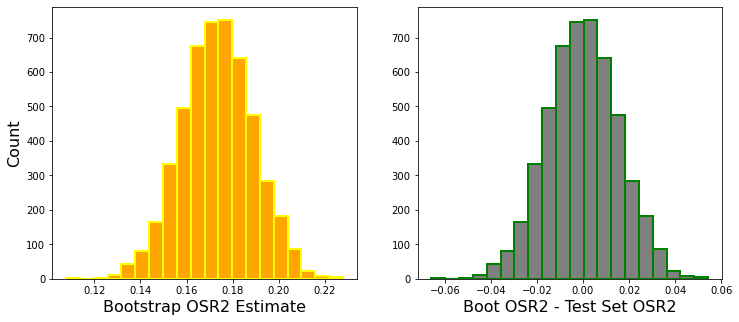

In [45]:

test_OSR2_RT = OS_R_squared(y_pred_RT,y_CTR_test,y_CTR_train)

fig, axs = plt.subplots(ncols=2, figsize=(12,5))
axs[0].set_xlabel('Bootstrap OSR2 Estimate', fontsize=16)
axs[1].set_xlabel('Boot OSR2 - Test Set OSR2', fontsize=16)
axs[0].set_ylabel('Count', fontsize=16)
axs[0].hist(bs_output_RT.iloc[:,0], bins=20,edgecolor='yellow', linewidth=2,color = "orange")
# axs[0].set_xlim([0.4,0.7])
#bias bootstrap
axs[1].hist(bs_output_RT.iloc[:,0]-test_OSR2_RT, bins=20,edgecolor='green', linewidth=2,color = "grey")
# axs[1].set_xlim([-0.15,0.15])

In [46]:
# The 95% confidence interval
CI= np.quantile(bs_output_RT.iloc[:,0]-test_OSR2_RT,np.array([0.025,0.975]))
print("The 95-percent confidence interval of OSR2(DTR) is %s" % CI)

The 95-percent confidence interval of OSR2(DTR) is [-0.03036009  0.03005902]


In [47]:
test_OSR2_RT

0.17355506853260683

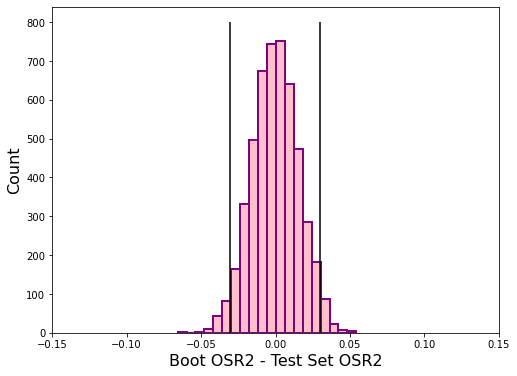

In [48]:
fig, axs = plt.subplots(ncols=1, figsize=(8,6))
axs.set_xlabel('Boot OSR2 - Test Set OSR2', fontsize=16)
axs.set_ylabel('Count', fontsize=16)
axs.hist(bs_output_RT.iloc[:,0]-test_OSR2_RT, bins=20,edgecolor='purple', linewidth=2,color = "pink")
axs.set_xlim([-0.15,0.15])
axs.vlines(x=CI[0], ymin = 0, ymax =800, color = "black")
axs.vlines(x=CI[1], ymin = 0, ymax =800, color = "black")

In [49]:
test_mae_RT = mean_absolute_error(y_pred_RT,y_CTR_test,y_CTR_train)

In [50]:
bs_output_RT.head()

,0,1
0,0.184471,0.618161
1,0.172222,0.626406
2,0.170352,0.629122
3,0.182700,0.613968
4,0.186027,0.615637


In [51]:
CI= np.quantile(bs_output_RT.iloc[:,1]-test_mae_RT,np.array([0.025,0.975]))
print("The 95-percent confidence interval of MAE(DTR) is %s" % CI)

The 95-percent confidence interval of MAE(DTR) is [-0.01873793  0.01835037]


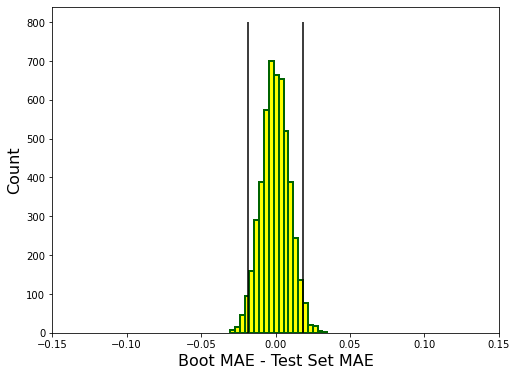

In [52]:
fig, axs = plt.subplots(ncols=1, figsize=(8,6))
axs.set_xlabel('Boot MAE - Test Set MAE', fontsize=16)
axs.set_ylabel('Count', fontsize=16)
axs.hist(bs_output_RT.iloc[:,1]-test_mae_RT, bins=20,edgecolor='darkgreen', linewidth=2,color = "yellow")
axs.set_xlim([-0.15,0.15])
axs.vlines(x=CI[0], ymin = 0, ymax =800, color = "black")
axs.vlines(x=CI[1], ymin = 0, ymax =800, color = "black")

In [53]:
#RandomForest -Confidence - intervals
bs_output_RF = bootstrap_validation(x_RF_test,y_RF_test,y_RF_train,rf_cv,
                                 metrics_list=[OS_R_squared,mean_absolute_error],
                                 sample = 5000)

(5000, 2)
0 0.10888004302978516
100 10.12617802619934
200 20.10252094268799
300 30.06063485145569
400 40.011115074157715
500 50.03531193733215
600 59.97644591331482
700 69.8761739730835
800 79.73190498352051
900 89.53635001182556
1000 99.32868313789368
1100 109.37726902961731
1200 119.26540184020996
1300 129.16320276260376
1400 138.97920107841492
1500 148.89024209976196
1600 158.8434829711914
1700 169.0300989151001
1800 179.0958468914032
1900 189.13037610054016
2000 199.15464615821838
2100 209.2746639251709
2200 219.41733694076538
2300 230.08168506622314
2400 240.29112720489502
2500 250.51802611351013
2600 260.67908477783203
2700 271.22101521492004
2800 281.4320819377899
2900 291.74376797676086
3000 301.8890039920807
3100 312.0627951622009
3200 322.1873941421509
3300 332.43808221817017
3400 342.577917098999
3500 352.7853469848633
3600 362.9890058040619
3700 373.1231369972229
3800 383.1364760398865
3900 393.2205572128296
4000 405.1254348754883
4100 446.8030731678009
4200 1107.8578891754

In [54]:
bs_output_RF.head()

,0,1
0,0.227725,0.581628
1,0.215565,0.622905
2,0.229821,0.593684
3,0.217011,0.605108
4,0.230068,0.619182


In [55]:
y_pred_RF=rf_cv.predict(x_RF_test)

In [56]:
test_OSR2_RF = OS_R_squared(y_pred_RF,y_RF_test,y_RF_train)

In [57]:
#OSR2

In [58]:
# The 95% confidence interval
CI= np.quantile(bs_output_RF.iloc[:,0]-test_OSR2_RF,np.array([0.025,0.975]))
print("The 95-percent confidence interval of OSR2(RF) is %s" % CI)

The 95-percent confidence interval of OSR2(RF) is [-0.02505521  0.02599038]


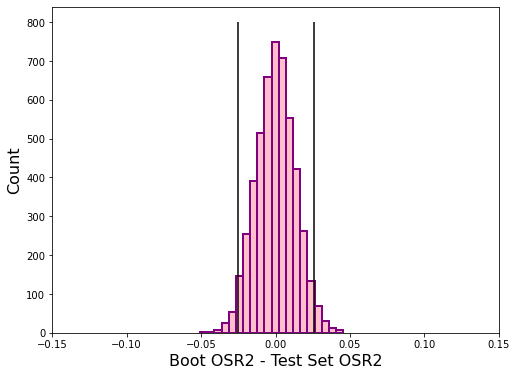

In [59]:
fig, axs = plt.subplots(ncols=1, figsize=(8,6))
axs.set_xlabel('Boot OSR2 - Test Set OSR2', fontsize=16)
axs.set_ylabel('Count', fontsize=16)
axs.hist(bs_output_RF.iloc[:,0]-test_OSR2_RF, bins=20,edgecolor='purple', linewidth=2,color = "pink")
axs.set_xlim([-0.15,0.15])
axs.vlines(x=CI[0], ymin = 0, ymax =800, color = "black")
axs.vlines(x=CI[1], ymin = 0, ymax =800, color = "black")

In [60]:
#MAE

In [61]:
test_mae_RF = mean_absolute_error(y_pred_RF,y_RF_test,y_RF_train)

In [62]:
CI= np.quantile(bs_output_RF.iloc[:,1]-test_mae_RF,np.array([0.025,0.975]))
print("The 95-percent confidence interval of MAE is %s" % CI)

The 95-percent confidence interval of MAE is [-0.01722329  0.01733546]


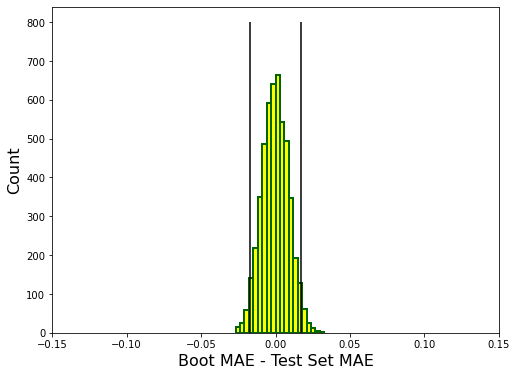

In [63]:
fig, axs = plt.subplots(ncols=1, figsize=(8,6))
axs.set_xlabel('Boot MAE - Test Set MAE', fontsize=16)
axs.set_ylabel('Count', fontsize=16)
axs.hist(bs_output_RF.iloc[:,1]-test_mae_RF, bins=20,edgecolor='darkgreen', linewidth=2,color = "yellow")
axs.set_xlim([-0.15,0.15])
axs.vlines(x=CI[0], ymin = 0, ymax =800, color = "black")
axs.vlines(x=CI[1], ymin = 0, ymax =800, color = "black")

### difference in the performance?

We can also bootstrap the statistic OSR2 of random forest - OSR2 of decision tree classifier
If the corresponding confidence interval contains 0, then there is 
no statistically significant difference between OSR2 values of the 
two methods

We can also bootstrap the statistic MAE of random forest - MAE of decision tree classifier
If the corresponding confidence interval contains 0, then there is 
no statistically significant difference between OSR2 values of the 
two methods


In [64]:
#comparison of OSR2

CI= np.quantile(bs_output_RF.iloc[:,0]-bs_output_RT.iloc[:,0],np.array([0.025,0.975]))
print("The 95-percent confidence interval of Difference in Model OR2 is %s" % CI)

The 95-percent confidence interval of Difference in Model OR2 is [0.01016524 0.08878736]


Since the 95-percent confidence interval of Difference in Model OR2 of the two models is [0.00929701 0.08824708] and does not contain a zero, the OR2 is significant. <br>
We can see that the std deviation of DecisionTreeRegressor is higher than that of Random forest.
<br>
<br>
We have a better confidence interval for random forest which is closer to the mean.
The 95-percent confidence interval of OSR2(RF) for Random Forest is [-0.02523559  0.02612551]
For DecisionTreeRegressor,The 95-percent confidence interval of OSR2(DTR) is [-0.03036009  0.03005902]

<br>

In [65]:
 #MAE comparison

In [66]:
CI= np.quantile(bs_output_RF.iloc[:,1]-bs_output_RT.iloc[:,1],np.array([0.025,0.975]))
print("The 95-percent confidence interval of Difference in Model MAE is %s" % CI)

The 95-percent confidence interval of Difference in Model MAE is [-0.04034413  0.01004864]


Since the The 95-percent confidence interval of Difference in Model MAE is [-0.04046588  0.00995343].
This interval contains a zero. This implies that these models are not statistically significant when it comes to MAE.